In [1]:
import pandas as pd
import numpy as np

In [2]:
training = pd.read_csv('mnist_train.csv', header=None)
training_labels = training.iloc[0:60000, 0]
training_images = training.iloc[0:60000, 1:]

test = pd.read_csv('mnist_test.csv', header=None)
test_labels = test.iloc[0:10000, 0]
test_images = test.iloc[0:10000, 1:]

## kNN without Dimensionality Reduction, k=3

In [3]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(training_images, training_labels)
y_pred = clf.predict(test_images)

In [4]:
#confusion matrix,accuracy_score,classification_report
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm = confusion_matrix(test_labels,y_pred)
print(accuracy_score(test_labels,y_pred))
print(classification_report(test_labels,y_pred))

0.9705
             precision    recall  f1-score   support

          0       0.97      0.99      0.98       980
          1       0.96      1.00      0.98      1135
          2       0.98      0.97      0.97      1032
          3       0.96      0.97      0.96      1010
          4       0.98      0.97      0.97       982
          5       0.97      0.96      0.96       892
          6       0.98      0.99      0.98       958
          7       0.96      0.96      0.96      1028
          8       0.99      0.94      0.96       974
          9       0.96      0.96      0.96      1009

avg / total       0.97      0.97      0.97     10000



In [5]:
from sklearn.metrics import accuracy_score
accuracy_score(test_labels, y_pred) 

0.97050000000000003

## kNN with PCA, k=3

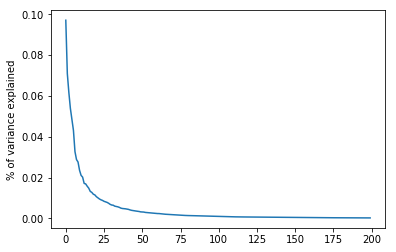

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import decomposition
from sklearn import datasets

## PCA decomposition
pca = decomposition.PCA(n_components=200) #Finds first 200 PCs
pca.fit(training_images)
plt.plot(pca.explained_variance_ratio_)
plt.ylabel('% of variance explained')
#plot reaches asymptote at around 50, which is optimal number of PCs to use. 

## PCA decomposition with optimal number of PCs
#decompose train data
pca = decomposition.PCA(n_components=50) #use first 3 PCs (update to 100 later)
pca.fit(training_images)
PCtrain = pd.DataFrame(pca.transform(training_images))
PCtrain['label'] = training_labels

PCtest = pd.DataFrame(pca.transform(test_images))
PCtest['label'] = test_labels

In [7]:
from sklearn import  metrics
X=PCtrain.drop('label', axis=1)[0:60000]
y = PCtrain['label'][0:60000]

clf_withPCA = KNeighborsClassifier(n_neighbors=3)
clf_withPCA.fit(X,y)

predicted = clf_withPCA.predict(PCtest.drop('label', axis=1)[0:10000])
expected = PCtest['label'][0:10000]

print("Classification report for classifier %s:\n%s\n"
      % (clf_withPCA, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

Classification report for classifier KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform'):
             precision    recall  f1-score   support

          0       0.97      0.99      0.98       980
          1       0.98      1.00      0.99      1135
          2       0.98      0.98      0.98      1032
          3       0.97      0.97      0.97      1010
          4       0.98      0.98      0.98       982
          5       0.98      0.97      0.97       892
          6       0.98      0.99      0.98       958
          7       0.97      0.97      0.97      1028
          8       0.98      0.95      0.97       974
          9       0.97      0.96      0.97      1009

avg / total       0.98      0.98      0.98     10000


Confusion matrix:
[[ 975    1    1    0    0    1    1    1    0    0]
 [   0 1130    3    0    0    0    1    0    0    1]
 [   5    2 1009    1    1    0   

In [9]:
from sklearn.metrics import accuracy_score
accuracy_score(expected, predicted)

0.97550000000000003

## kNN with LDA , k=3

In [11]:
from sklearn import discriminant_analysis
from sklearn import datasets

COMPONENT_NUM = 35
## LDA 
lda = discriminant_analysis.LinearDiscriminantAnalysis(n_components=COMPONENT_NUM) #Finds enough components
lda.fit_transform(training_images,training_labels)
var_explained = lda.explained_variance_ratio_.cumsum()

In [12]:
## LDA decomposition with optimal number of PCs
#decompose train data
lda_training = discriminant_analysis.LinearDiscriminantAnalysis(n_components=len(var_explained)-1) 
lda_training.fit(training_images,training_labels)
LDAtrain = pd.DataFrame(lda_training.transform(training_images))
LDAtrain['label'] = training_labels

LDAtest = pd.DataFrame(lda_training.transform(test_images))
LDAtest['label'] = test_labels

In [13]:
X=LDAtrain.drop('label', axis=1)[0:60000]
y = LDAtrain['label'][0:60000]

clf_withLDA = KNeighborsClassifier(n_neighbors=3)
clf_withLDA.fit(X,y)

predicted = clf_withLDA.predict(LDAtest.drop('label', axis=1)[0:10000])
expected = LDAtest['label'][0:10000]

print("Classification report for classifier %s:\n%s\n"
      % (clf_withLDA, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))



Classification report for classifier KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform'):
             precision    recall  f1-score   support

          0       0.93      0.97      0.95       980
          1       0.94      0.98      0.96      1135
          2       0.91      0.90      0.90      1032
          3       0.87      0.87      0.87      1010
          4       0.89      0.92      0.90       982
          5       0.84      0.83      0.83       892
          6       0.95      0.94      0.94       958
          7       0.93      0.91      0.92      1028
          8       0.87      0.83      0.85       974
          9       0.90      0.88      0.89      1009

avg / total       0.90      0.90      0.90     10000


Confusion matrix:
[[ 954    0    5    2    1    4    9    4    1    0]
 [   0 1110    4    6    0    2    2    1   10    0]
 [  18    9  925   14   12    2   

In [14]:
from sklearn.metrics import accuracy_score
accuracy_score(expected, predicted)

0.90390000000000004